In [4]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pickle.load(open('data.p', 'rb'))
print(data)

[{'date': datetime.date(2017, 10, 27), 'btc_tx_volume': 9780217059.503008, 'btc_mktcap': 98233030896.0, 'btc_price': 5899.74, 'btc_exchange_volume': 1710130048.0, 'eth_tx_volume': 3150264533.0124774, 'eth_mktcap': 28276657471.32553, 'eth_price': 296.51, 'eth_exchange_volume': 257168991.99999997, 'ltc_tx_volume': 173006316.35733452, 'ltc_mktcap': 2982126709.483282, 'ltc_price': 55.67, 'ltc_exchange_volume': 78923104.0, 'xrp_tx_volume': 25133671.195290733, 'xrp_mktcap': 7847641468.86683, 'xrp_price': 0.203668, 'xrp_exchange_volume': 29623000.000000004}, {'date': datetime.date(2017, 10, 28), 'btc_tx_volume': 6965317470.543407, 'btc_mktcap': 96375664793.26253, 'btc_price': 5787.82, 'btc_exchange_volume': 1403920000.0, 'eth_tx_volume': 3838503881.1715865, 'eth_mktcap': 28416724623.16301, 'eth_price': 297.92, 'eth_exchange_volume': 264424000.0, 'ltc_tx_volume': 154701105.692616, 'ltc_mktcap': 2967543021.283599, 'ltc_price': 55.38, 'ltc_exchange_volume': 71063200.0, 'xrp_tx_volume': 13598142.

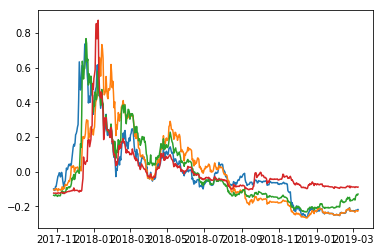

In [20]:
# plot price data

dates = [x['date'] for x in data]
prices_ = [{k:v for k,v in x.items() if k in ['btc_price', 'eth_price', 'ltc_price', 'xrp_price']} for x in data]
prices = pd.DataFrame(prices, index = dates)
prices_norm = (prices - prices.mean()) / (prices.max() - prices.min())
plt.plot(prices_norm)

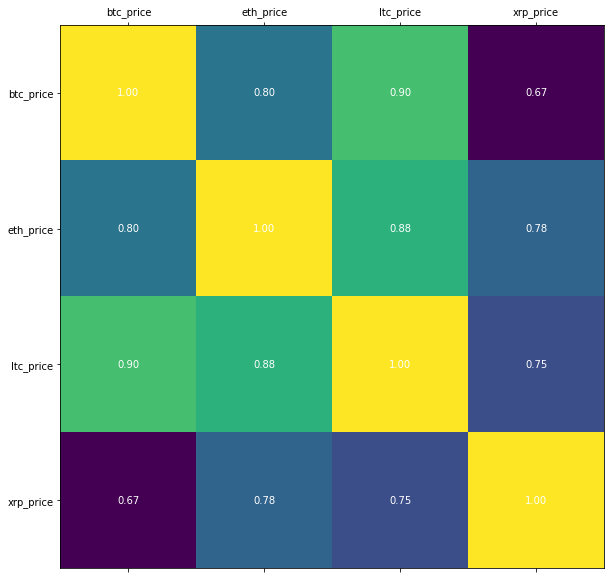

In [36]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    # Loop over data dimensions and create text annotations.
    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            ax.text(j, i, '{:0.2f}'.format(corr.iloc[i, j]), ha="center", va="center", color="w")

plot_corr(prices)

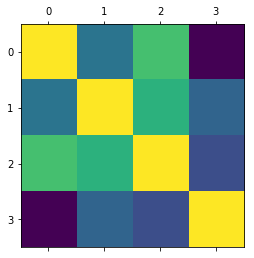